In [29]:
import numpy as np
def load_annotation(ann_file): # get label and image name from a txt document
    # create a ditc as following
    data_infos = {}
    with open(ann_file) as f:
        # strip() except line
        # split(' '): space is the split symbol
        # samples is a list
        # eg:[['image11.jpg,'0'],['image22.jpg,'1'],['image33.jpg,'3']]
        samples = [x.strip().split(' ') for x in f.readlines()]
        for filename, gt_label in samples:
            # filename是图像名字--'image11.jpg'，gt_label--'0' is label, it wll be added to 'data_infos'
            # set value as array(gt_label,dtype=int64)类型
            data_infos[filename] = np.array(gt_label, dtype=np.int64)
        # dict format：{'image11.jpg':array(0,dtype=int64),'image22.jpg':array(1,dtype=int64)}
    return data_infos


In [30]:
img_label = load_annotation('testload.txt')
image_name = list(img_label.keys())  # get key value
label = list(img_label.values())  # get label value
print(img_label.keys())

dict_keys(['c1.jpg', 'c2.jpg', 'c3.jpg', 'c4.jpg', 'c5.jpg', 'l1.jpg', 'l2.jpg', 'l3.jpg', 'l4.jpg', 'l5.jpg', 'l6.jpg', 'l7.jpg', 'l8.jpg', 'l9.jpg', 'l10.jpg', 'q1.jpg', 'q2.jpg', 'q3.jpg', 'q4.jpg', 'q5.jpg', 'q6.jpg'])


In [31]:
print(label)

[array(1), array(1), array(1), array(1), array(1), array(2), array(2), array(2), array(2), array(2), array(2), array(2), array(2), array(2), array(2), array(3), array(3), array(3), array(3), array(3), array(3)]


In [32]:
from torch.utils.data import Dataset
class YourDataset(Dataset):  # from Dataset class 
    # 构造函数必须存在
    def __init__(self, root_dir, ann_file, transform=None):
        self.ann_file = ann_file
        self.root_dir = root_dir
        self.img_label = self.load_annotations()  # img_label is a dict
        self.img = [os.path.join(self.root_dir, img) for img in list(self.img_label.keys())]
        self.label = [label for label in list(self.img_label.values())]
        self.transform = transform  # data preprocess
 
    def __len__(self):
        return len(self.img)
 
    # no modify for index, idx will be generate from random
    # one batch from __getitem__ func
    def __getitem__(self, idx):
        image = Image.open(self.img[idx]).convert('RGB')  # img is the real path in fact. convert is important to png format
        label = self.label[idx]
        if self.transform:
            image = self.transform(image)  
        label = torch.from_numpy(np.array(label))  
        return image, label
 
    def load_annotations(self):
        data_infos = {}
        with open(self.ann_file) as f:
            samples = [x.strip().split(' ') for x in f.readlines()]
            for filename, gt_label in samples:
                data_infos[filename] = np.array(gt_label, dtype=np.int64)
        return data_infos

In [33]:
# create：key - value
import torchvision.transforms as transforms
data_transforms = {
    # data process
    'train': transforms.Compose([
        transforms.Resize([256, 256]),  # resize for meet training model size requirement
 
        # image aug
        transforms.RandomRotation(45),  # random rotate
        #transforms.CenterCrop(64),  # center crop， from 
        transforms.RandomHorizontalFlip(p=0.5),  # by probability 0.5
        transforms.RandomVerticalFlip(p=0.5),  # 
 
        #transforms.ColorJitter(brightness=0.2, contrast=0.1, saturation=0.1, hue=0.1),  # Parameter 1 is brightness, parameter 2 is contrast, parameter 3 is saturation, and parameter 4 is hue
        #transforms.RandomGrayscale(p=0.025),  # Probability is converted to grayscale, and 3 channels are R=G=B (the three color channel is converted to a single color channel, and this processing is rarely performed)
 
        # transfer to tensor and Norm
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Set the mean and standard deviation to correspond to the three mean and standard deviation values of the R, G, and B color channels, respectively，(x-μ)/σ
    ]),
 
    # for valid dataset
    'valid': transforms.Compose([transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                 ]),
}

In [34]:
import os
from torch.utils.data import DataLoader

train_dataset = YourDataset(root_dir='/home/zhf/PyTorch-GAN/data/gendata', ann_file='testload.txt', transform=data_transforms['train'])

#valid_dataset = YourDataset(root_dir=valid_dir, ann_file='./valid.txt', transform=data_transforms['valid'])
# instance by DataLoader 
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
#valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


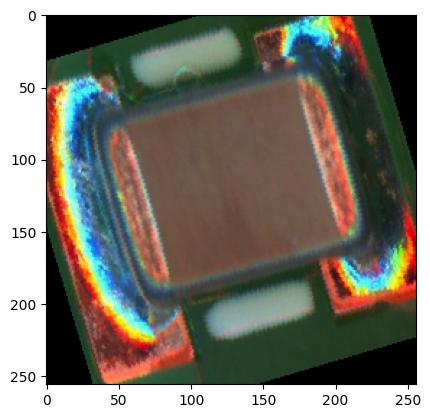

Label is: 2


'\nplt.imshow()：\n1.plt.imshow()用于显示图像数据或二维数组（也可以是三维数组，表示RGB图像）。\n2.当你有一个二维数组或图像数据时，你可以使用plt.imshow()将其可视化为图像。\n3.它将数组中的每个元素的值映射为一个颜色，并将这些颜色排列成图像的形式。\n4.plt.imshow()可以接受许多参数，用于控制图像的外观，例如颜色映射（colormap）、插值方法等。\nplt.show()：\n1.plt.show()用于显示所有已创建的图形。\n2.在使用Matplotlib绘制图形时，图形被存储在内存中，但不会自动显示在屏幕上。为了在屏幕上显示图形，你需要调用plt.show()函数。\n3.通常，在你创建完所有的图形之后，调用plt.show()一次，它会同时显示所有的图形窗口。\n'

In [35]:
# check by display
from PIL import Image
import torch
import matplotlib.pyplot as plt
image1, label1 = next(iter(train_loader))  
sample = image1[0].squeeze()  

sample = sample.permute((1, 2, 0)).numpy()

sample *= [0.229, 0.224, 0.225]
sample += [0.485, 0.456, 0.406]
plt.imshow(sample)
plt.show()
print('Label is: {}'.format(label1[0].numpy()))
 
 

 
 
#show the image from dataloader


In [36]:
dataloaders = {'train': train_loader}
#dataloaders = {'train': train_loader, "valid": valid_loader}
for inputs, labels in dataloaders['train']:
    print("train processing")
#for inputs, labels in dataloaders['valid']:
#    print("valid processing")

处理训练集
处理训练集
处理训练集
处理训练集
处理训练集
处理训练集
处理训练集
处理训练集
处理训练集
处理训练集
处理训练集
处理训练集
处理训练集
处理训练集
处理训练集
处理训练集
处理训练集
处理训练集
处理训练集
处理训练集
处理训练集
